# Assignment

Find a dataset on Kaggle that illustrate 2 versions

Define the context of the A|B testing.

Use A/B testing to find decide the better option in the context of the dataset.

Use steps in example.

### Import required modules

In [66]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### Find a dataset on Kaggle that `illustrates 2 versions`

For this project, I will be using a dataset on Nigerian Foods

In [24]:
# Download latest version
df_path = kagglehub.dataset_download("franklycypher/nigerian-foods")

In [25]:
df = pd.read_csv(f'{df_path}/Nigerian Foods.csv')

In [26]:
# Peek into the dataset
df.head()

,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,Abacha,"African salad, utazi leaves, oil, fish",Cassava-based salad with spicy fish,Healthy,Traditional,South-East,Spicy,Affordable
1,Abacha and Ugba (Regular),"Abacha (Cassava Fufu), Ugba (Oilbean Seeds)",Shredded cassava fufu served with oilbean seeds.,Healthy,Traditional,Eastern,NaN,Affordable
2,Abacha and Ugba,"African salad, oil, fish, fermented oil bean s...",Cassava-based salad with spicy fish and fermen...,Healthy,Salad,South-East,Spicy,Affordable
3,Afang Soup (Spicy),"Afang Leaves, Water yam, Seafood","Spicy soup made with afang leaves, water yam, ...",Healthy,Traditional,Southern,Spicy,Affordable
4,Afang Soup,"Afang leaves, waterleaf, meat, fish",Nutritious soup made with wild spinach and wat...,Healthy,Traditional,South-South,Mild,Affordable


In [27]:
# Check the columns
df.columns

Index(['Food_Name', 'Main_Ingredients', 'Description', 'Food_Health',
       'Food_Class', 'Region', 'Spice_Level', 'Price_Range'],
      dtype='object')

##### Check of a column that has just 2 categories

In [28]:
df['Food_Health'].unique()

array(['Healthy', 'Non-Healthy', 'Not Healthy', 'Moderately Healthy',
       'Healthy (varies)'], dtype=object)

In [29]:
df['Price_Range'].unique()

array(['Affordable', 'Very Expensive', 'Moderate', 'Moderate-Expensive',
       'Expensive'], dtype=object)

In [30]:
df['Spice_Level'].unique()

array(['Spicy', nan, 'Mild', 'None - Mild', 'Varies', 'Medium',
       'Mild - Spicy'], dtype=object)

In [31]:
df['Food_Class'].unique()

array(['Traditional', 'Salad', 'Modern', 'Bread', 'Breakfast', 'Soup',
       'Snack', 'Stew', 'Dish', 'Side Dish', 'Beverage', 'Swallow',
       'Combo', 'Dessert'], dtype=object)

### Define the context of the A|B Testing

In this test, we are going to determine which is healthier between Traditional And Mordern food classes. It will help decide if Nigerians should keep eating their `Modern Food`.

##### Define Groups

`Group A`: The control group - Traditional Nigerian Food

`Group B`: The treatment group - Modern Nigerian Food


##### Define the case studies

`Case study`: Nigerian Food Class (Traditional) - This is what our parents and the people before them ate.

`Case study`: Nigerian Food Class (Modern) - This mostly what an average Nigerian eats now.

### Metric

The outcome we want to measure is the Food_Health, which is Categorization of the dish's general healthfulness (`Healthy`, `Non-Healthy`, `Not Healthy`, `Moderately Healthy`, `Healthy (varies)`)`.

Given that this dataset has 5 categories and cannot be split into 2 equal parts, we are going to consider only the extremes `Healthy, Healthy (varies)` and `(Not Healthy, Non-Healty)`

##### Hypothesis Testing

`Null Hypothesis`: There is no significant difference in the healthiness of Traditional and Modern food classes for Nigerians.

`Alternative Hypothesis`: There is a significant difference in the healthiness of Traditional and Modern food classes for Nigerians.

### A/B Testing

In [32]:
# Extract the traditional Nigerian Foods
traditional_df = df[df['Food_Class'] == 'Traditional']

In [33]:
traditional_df.head()

,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
0,Abacha,"African salad, utazi leaves, oil, fish",Cassava-based salad with spicy fish,Healthy,Traditional,South-East,Spicy,Affordable
1,Abacha and Ugba (Regular),"Abacha (Cassava Fufu), Ugba (Oilbean Seeds)",Shredded cassava fufu served with oilbean seeds.,Healthy,Traditional,Eastern,NaN,Affordable
3,Afang Soup (Spicy),"Afang Leaves, Water yam, Seafood","Spicy soup made with afang leaves, water yam, ...",Healthy,Traditional,Southern,Spicy,Affordable
4,Afang Soup,"Afang leaves, waterleaf, meat, fish",Nutritious soup made with wild spinach and wat...,Healthy,Traditional,South-South,Mild,Affordable
5,Afang Soup (Seafood),"Afang leaves, expensive seafood (lobster, praw...","Nutritious soup made with wild spinach, expens...",Healthy,Traditional,South-South,Mild,Very Expensive


In [34]:
# Extract the modern Nigerian Foods
modern_df = df[df['Food_Class'] == 'Modern']

In [35]:
modern_df.head()

,Food_Name,Main_Ingredients,Description,Food_Health,Food_Class,Region,Spice_Level,Price_Range
7,Agege Bread,"Flour, Yeast, Sugar","Soft, slightly sweet bread with a crispy crust.",Non-Healthy,Modern,Lagos,NaN,Affordable
13,Ayamase Sauce,"Green peppers, onions, locust beans, spices","Spicy green pepper sauce, often paired with Of...",Moderately Healthy,Modern,South-West,Spicy,Affordable
32,Coconut Rice,"Rice, coconut milk, vegetables, chicken",Rice cooked with coconut milk and spices,Moderately Healthy,Modern,Nationwide,Mild,Affordable
33,Coconut Rice (Seafood),"Rice, coconut milk, vegetables, expensive seaf...","Rice cooked with coconut milk and spices, feat...",Moderately Healthy,Modern,Nationwide,Mild,Expensive
50,Fried Rice,"Rice, vegetables, chicken, shrimp",Stir-fried rice with colorful vegetables and p...,Moderately Healthy,Modern,Nationwide,Mild,Affordable


In [49]:
# Extract the count of the traditional Nigerian Foods
total_traditional_food = traditional_df.shape[0]
healthy_traditional_food = traditional_df[(traditional_df['Food_Health'] == 'Healthy') | (traditional_df['Food_Health'] == 'Healthy (Varies)')].shape[0]
not_healthy_traditional_food = traditional_df[(traditional_df['Food_Health'] == 'Non-Healthy') | (traditional_df['Food_Health'] == 'Not Healthy')].shape[0]

In [50]:
# Extract the count of the modern Nigerian Foods
total_modern_food = modern_df.shape[0]
healthy_modern_food = modern_df[(modern_df['Food_Health'] == 'Healthy') | (modern_df['Food_Health'] == 'Healthy (Varies)')].shape[0]
not_healthy_modern_food = modern_df[(modern_df['Food_Health'] == 'Non-Healthy') | (modern_df['Food_Health'] == 'Not Healthy')].shape[0]

In [51]:
ab_df = pd.DataFrame({
    'Food Class': ['Traditional', 'Modern'],
    'Total': [total_traditional_food, total_modern_food],
    'Healthy': [healthy_traditional_food, healthy_modern_food],
    'Not Healthy': [not_healthy_traditional_food, not_healthy_modern_food]
})

In [52]:
ab_df.head()

,Food Class,Total,Healthy,Not Healthy
0,Traditional,51,42,2
1,Modern,6,0,1


### Visualize

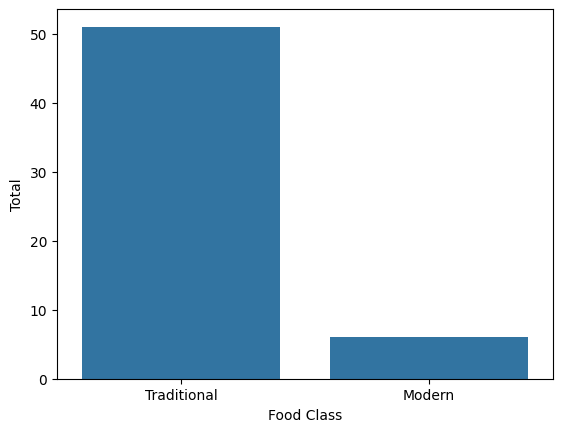

In [62]:
sns.barplot(x='Food Class', y='Total', data=ab_df)
plt.show()

##### Perform a Chi-Square Test

In [64]:
# Convert to numpy array
contigency_table = ab_df[['Healthy', 'Not Healthy']].to_numpy()

In [65]:
contigency_table

array([[42,  2],
       [ 0,  1]])

In [67]:
# Perform chi-square test
chi_2, p_value, dof, expected = chi2_contingency(contigency_table)
print(f'chi2: {chi_2}')
print(f'p-value: {p_value}')
print(f'dof: {dof}')
print(f'expected: {expected}')

chi2: 3.0864448051948052
p-value: 0.07894712204594984
dof: 1
expected: [[41.06666667  2.93333333]
 [ 0.93333333  0.06666667]]


In [68]:
# P-Value: if p-value < 0.05, we reject the null hypothesis

### Conclusion

We accept the `Null Hypothesis` given than the `P-value` of `0.07894712204594984` is greater than `0.05`, which means there is no significant difference in the healthiness of Traditional and Modern food classes for Nigerians: 

In [ ]:
x = [1]
for i in x:
    x.append(i+1)
    print(x)

[1]
